<a href="https://colab.research.google.com/github/nureeee/DeepLearning/blob/main/06_Haar_Cascade_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 파일 업로드

In [ ]:
from google.colab import files
upload_file = files.upload()

Saving haarcascade_eye_tree_eyeglasses.xml to haarcascade_eye_tree_eyeglasses.xml
Saving haarcascade_frontalface_alt.xml to haarcascade_frontalface_alt.xml
Saving obama_01.jpeg to obama_01.jpeg
Saving obama_01.mp4 to obama_01.mp4
Saving obama_02.jpeg to obama_02.jpeg
Saving obama_03.jpg to obama_03.jpg


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
file_name = 'obama_01.jpeg'
face_cascade_name = 'haarcascade_frontalface_alt.xml'
eye_cascade_name = 'haarcascade_eye_tree_eyeglasses.xml'

In [ ]:
eye_cascade = cv2.CascadeClassifier()

In [ ]:
face_cascade = cv2.CascadeClassifier()

In [ ]:
eye_cascade.load(cv2.samples.findFile(eye_cascade_name))

True

In [ ]:
face_cascade.load(cv2.samples.findFile(face_cascade_name))

True

In [ ]:
img = cv2.imread(file_name)

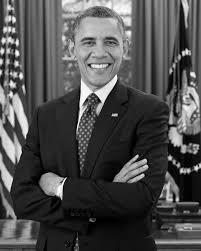

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

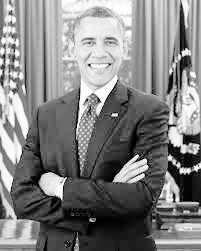

In [ ]:
# 균일화 하기
gray = cv2.equalizeHist(gray)
cv2_imshow(gray)

In [ ]:
faces = face_cascade.detectMultiScale(gray)
faces.shape
# 얼굴 이미지가 한개가 있다

(1, 4)

In [ ]:
faces # [x, y, w, h]

array([[69, 19, 60, 60]], dtype=int32)

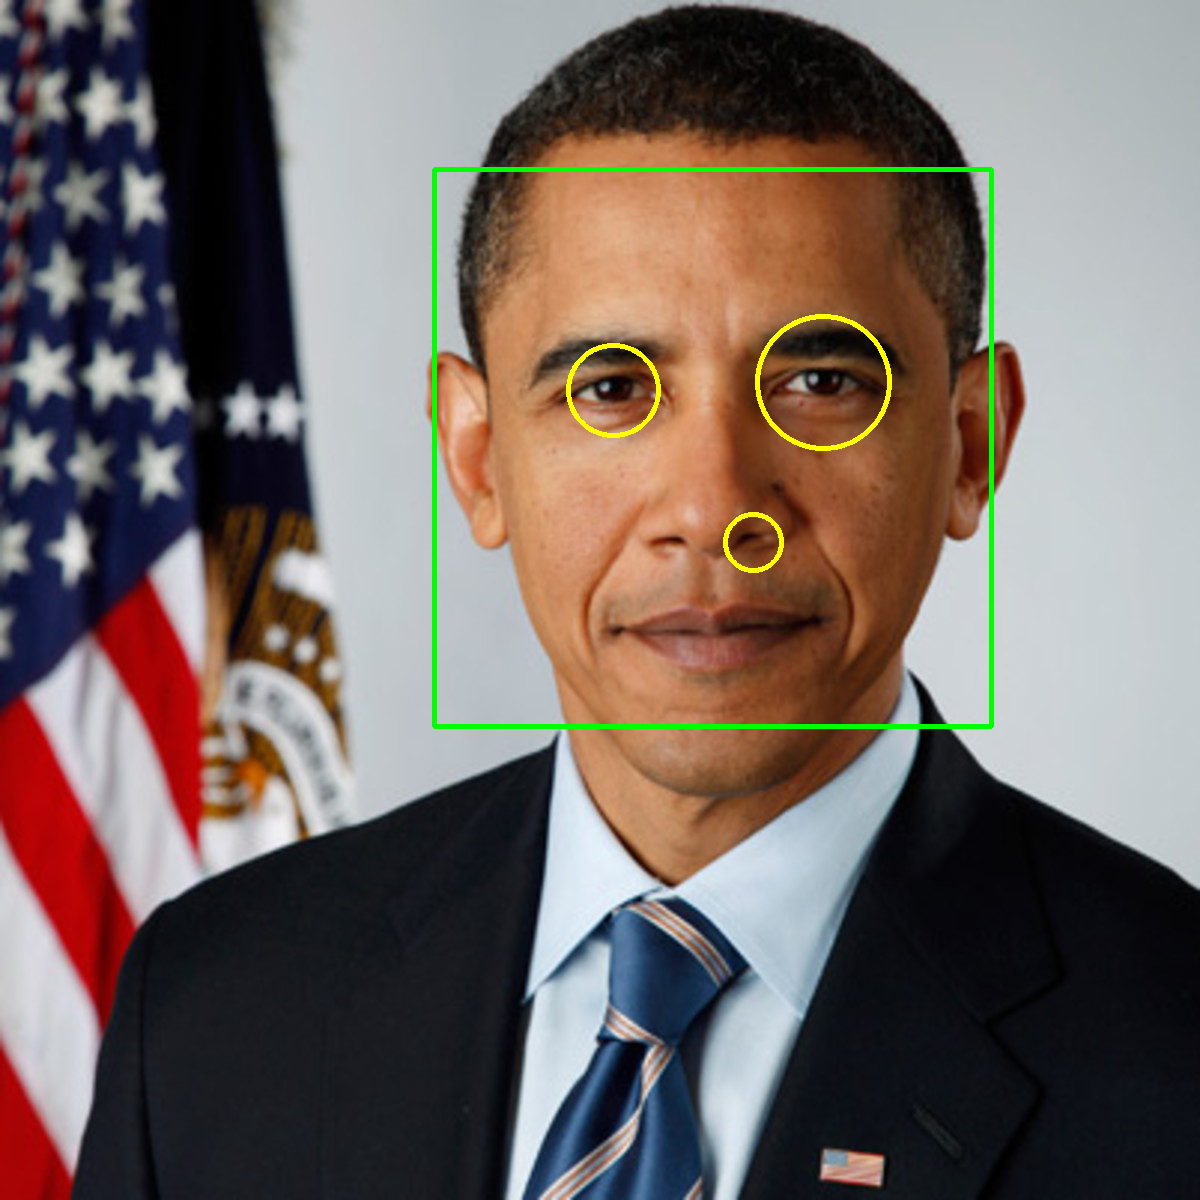

In [ ]:
img_copy = img.copy()
for (x, y, w, h,) in faces:
    # center 좌표
    center = (x + w // 2, y + h // 2)


    img_copy = cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 3)

    # 눈을 찾는다
    # ROI : region of interest
    faceROI = gray[y: y+h, x:x+w]
    
    eyes = eye_cascade.detectMultiScale(faceROI)

    for (x2, y2, w2, h2) in eyes:
        eye_center = (x + x2 + w2 // 2, y + y2 + h2//2)
        radius = int(round(w2+ h2) * 0.25)
        img_copy = cv2.circle(img_copy, eye_center, radius, (0, 255, 255), 3)
    cv2_imshow(img_copy)

In [ ]:
file_name = 'obama_01.mp4'

In [ ]:
import IPython

def detectAndDisplay(frame):
    IPython.display.clear_output(wait=True)
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    frame_gray = cv2.equalizeHist(frame_gray)

    fades = face_cascade.detectMultiScale(frame_gray)

    for (x, y, w, h) in faces:
        frame = cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 3)
        faceROI = frame_gray[y:y+h, x:x+w]

        eyes = eye_cascade.detectMultiScale(faceROI)

        for (x2, y2, w2, h2) in eyes:
            eye_center = (x+x2+w2//2, y+y2+h2//2)
            radius = int(round((w2+h2)*0.25))
            frame = cv2.circle(frame, eye_center, radius, (255, 0, 0), 4)
    
    cv2_imshow(frame)

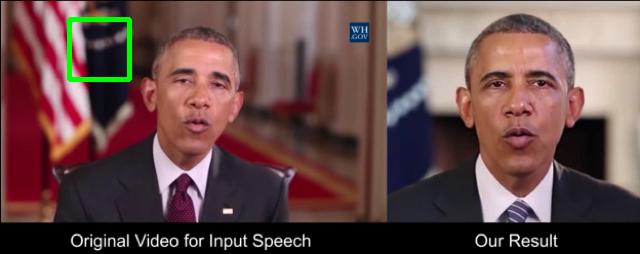

KeyboardInterrupt: ignored

In [ ]:
cap = cv2.VideoCapture(file_name)
while True:
    re, frame = cap.read()
    
    if frame is None:
        print('영상끝')
        break
    detectAndDisplay(frame)
    